## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(merge_df)

1893

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# DataFrame.duplicated(subset=None, keep='first')
dupeMice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"]
dupeMiceUnique = dupeMice.unique()
print(f"duplicate mice: {dupeMiceUnique}")


Duplicate Mice ID: ['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeData = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint",])]
dupeData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(cleanData["Mouse ID"].unique())
print({mice_count})

{249}


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimenMean = cleanData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# regimenMean

regimenMedian = cleanData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# regimenMedian

regimenVar = cleanData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# regimenVar

regimenStdev = cleanData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# regimenStdev

regimenSem = cleanData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# regimenSem

# Assemble the resulting series into a single summary dataframe.
summaryDf = pd.DataFrame({"Mean": regimenMean, "Median":regimenMedian, "Variance":regimenVar, "Standard Deviation": regimenStdev, "SEM": regimenSem})
summaryDf



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregate = cleanData.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
aggregate


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

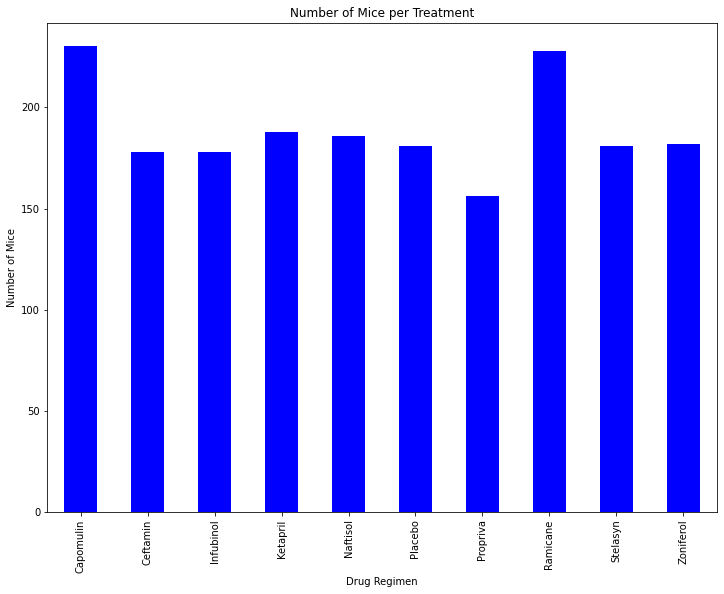

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<Figure size 432x288 with 0 Axes>

In [114]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

perDrug = cleanData.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = perDrug.plot(kind="bar", color='b', figsize=(12,9))
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

# mice_count
perDrug


[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

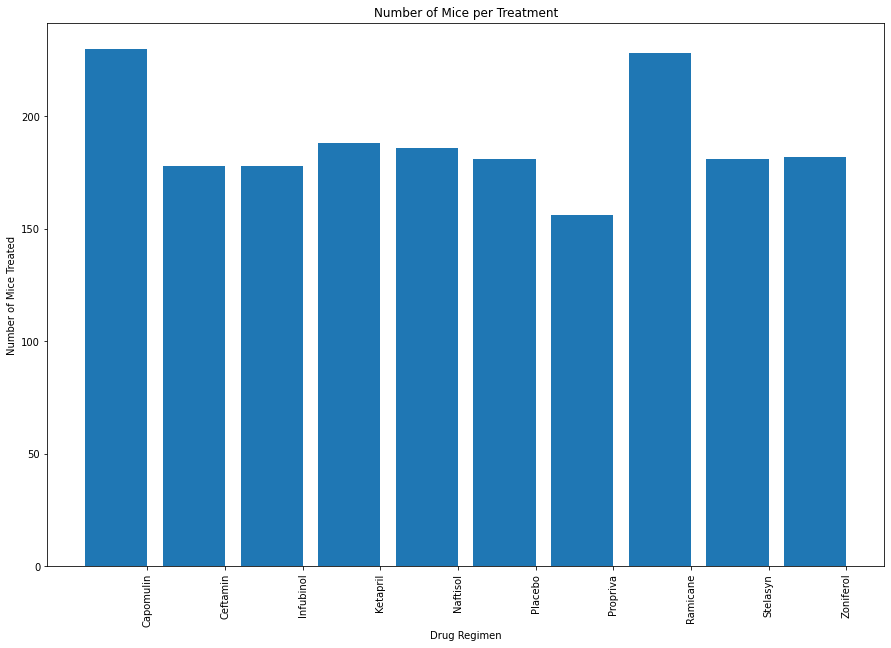

In [115]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = (cleanData.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
timepoints

x_axis = np.arange(len(mice_per_drug))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(tick_locations, perDrug.index.values, rotation="vertical")
plt.bar(x_axis, timepoints, alpha=1)
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")

timepoints


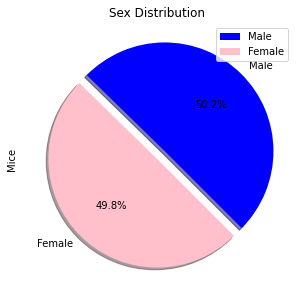

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sexData = cleanData.loc[:, ["Sex", "Mouse ID"]]
sexData = sexData.drop_duplicates()
sexCount = sexData["Sex"].value_counts()

sexDf = pd.DataFrame({"Mice": sexCount})

colors = ["blue", "pink"]
explode = (0.1, 0)
pandas_pie = sexDf.plot(kind="pie", figsize=(6,5), colors=colors, y="Mice", title="Sex Distribution",
                              startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
plt.show()

# sexDf

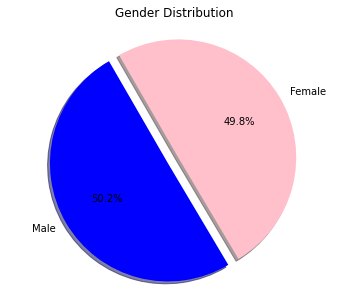

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexData = cleanData.loc[:, ["Sex", "Mouse ID"]]
sexData = sexData.drop_duplicates()
# sexData
sexCount = sexData["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "pink"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.title("Gender Distribution")
plt.pie(sexCount, labels=labels, colors=colors, startangle=120, explode=explode, shadow=True, autopct="%1.1f%%")

plt.axis("equal")

plt.show()



## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint = cleanData.groupby(["Mouse ID"])["Timepoint"].max()
maxTimepoint = maxTimepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedMaxDf = maxTimepoint.merge(cleanData, on=["Mouse ID", "Timepoint"], how="left")
mergedMaxDf.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = mergedMaxDf.loc[mergedMaxDf["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorData.append(tumorVol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumorVol.loc[(tumorVol < lower_bound) | (tumorVol > upper_bound)]
    print(f"{drug} outliers (if any) are: {outliers}")
    

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


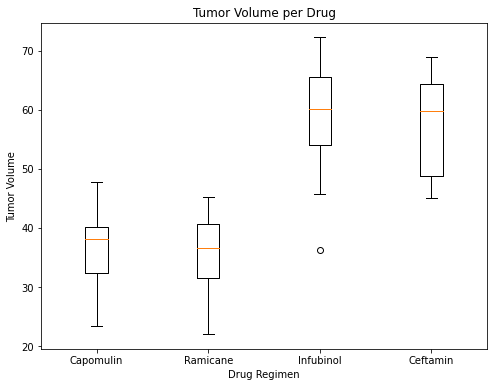

In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Tumor Volume per Drug')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.2)
plt.show()

## Line and Scatter Plots

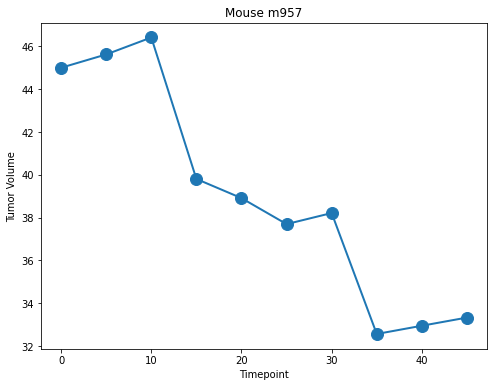

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# grab a mouse's data
mouse = cleanData.loc[cleanData["Mouse ID"] == "m957",:]

# generate axes
x_axis = mouse["Timepoint"]
tumorVolume = mouse["Tumor Volume (mm3)"]
# pretty up plot
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.title("Mouse m957")
plt.plot(x_axis, tumorVolume,linewidth=2, markersize=12,marker="o", label="mm3")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()


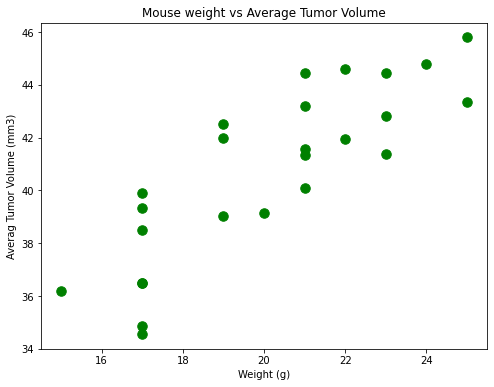

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# isolate and clean Capomulin data
dfCapo = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin",:]
dfCapoGroup = dfCapo.groupby(['Mouse ID']).mean()
# plot and make pretty
fig1, ax1 = plt.subplots(figsize=(8, 6))
marker_size=14
plt.scatter(dfCapoGroup['Weight (g)'],dfCapoGroup['Tumor Volume (mm3)'],s=90, color="green")
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()
dfCapoGroup.head()


## Correlation and Regression

Correlation is: 0.84
Formula is: y = 0.95x + 21.55


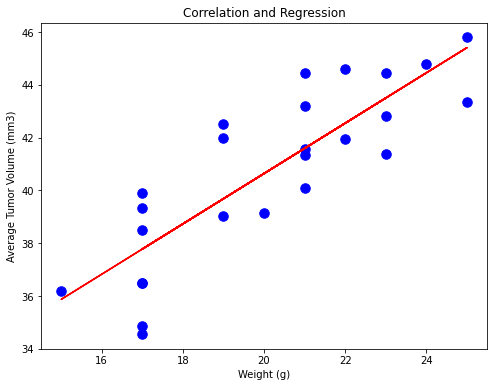

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

xSeries = dfCapoGroup['Weight (g)']
ySeries = dfCapoGroup['Tumor Volume (mm3)']

correlation = round(st.pearsonr(xSeries,ySeries)[0],2)
print(f"Correlation is: {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xSeries, ySeries)
regress = xSeries * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Formula is: {lineEquation}')

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(xSeries,ySeries, s=90, color="blue")
plt.plot(xSeries,regress,"r-")
plt.title("Correlation and Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
